<a href="https://colab.research.google.com/github/Baldezo313/Some-real-world-machine-learning-project/blob/main/PROJET_7_CLUSTERING_AVEC_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 7 : CLUSTERING AVEC KMEANS    

Comprenez le mot clustering comme regroupement en classes. Le Clustering est une technique
d'apprentissage automatique non-supervisé dont l'objectif est de découvrir les groupes sousjacents
(ou "clusters") dans un ensemble de données. Ici on ne dispose pas de données étiquetées
comme c'est le cas dans l'apprentissage automatique supervisé. L'algorithme regroupe les objets
similaires en termes de leurs caractéristiques. Dans chaque groupe, on a donc des observations
similaires mais les groupes sont distincts les uns des autres.  

Cette technique est très utilisée dans le domaine du Marketing pour réaliser la segmentation de
clientèle. La Segmentation est une pratique de partitionnement des clients en groupes
d'individus ayant les mêmes caractéristiques (On utilise souvent les données démographiques
des clients car elles sont plus faciles à collecter). Cette stratégie permet de comprendre le
comportement des clients, sur la base de leurs données historiques, et donc d'utiliser
efficacement les ressources allouées au Marketing.  

Dans cette section, vous apprendrez à utiliser l'algorithme KMeans [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) qui est le plus populaire
pour les tâches de clustering.

## INITIATION A KMEANS  

Le but de cette section est d'explorer l'algorithme de partitionnement automatique KMeans sur
des jeux de données synthétiques 2D.  

Cet exercice est inspiré en partie de cette page de [la documentation scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py). La théorie
mathématique derrière l’algorithme KMeans est décrite dans cette [page](https://scikit-learn.org/stable/modules/clustering.html#k-means)

In [1]:
# Données synthétiques 2D
from sklearn import datasets
import numpy as np


n_samples = 500

# blobs isotropes
random_data = datasets.make_blobs(n_samples=n_samples, random_state=8)

X,y = random_data

* Visualisons le jeu de données à partitionner à l'aide d'un graphique de nuage de points :

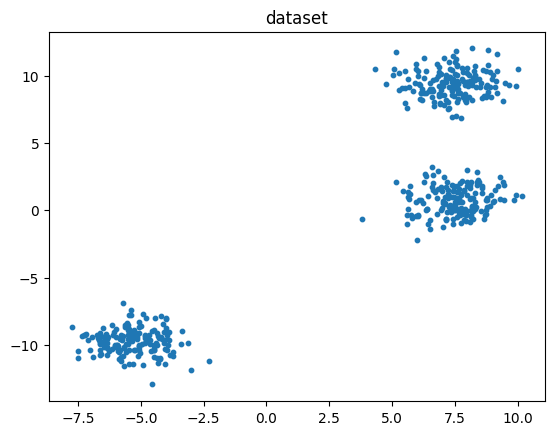

In [2]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('dataset')
plt.show()

Le nuage de points ci-dessus nous suggère trois groupes distincts. Appliquons alors l'algorithme
*KMeans* avec 3 clusters.

In [3]:
# Importation du module KMeans
from sklearn.cluster import KMeans

# Création d'un modèle KMeans avec 3 clusters
model = KMeans(n_clusters=3)

# Entraînement du modèle
model.fit(X)

# Clusters (labels)
labels = model.predict(X)
print(labels)

[1 0 0 2 2 2 0 2 0 0 0 2 2 1 2 1 2 1 1 2 0 1 0 0 1 2 2 1 0 0 2 1 1 0 2 2 0
 1 1 0 1 0 2 0 2 2 0 1 0 0 2 0 1 0 1 0 2 0 1 0 0 2 0 1 2 1 2 2 2 2 2 0 2 0
 2 2 2 1 2 2 2 0 0 0 0 2 1 2 1 2 2 0 0 2 2 1 1 2 0 0 1 2 1 0 2 0 1 0 2 0 0
 0 2 0 2 0 1 0 0 2 0 1 2 0 2 1 0 0 1 2 2 1 2 2 2 0 1 1 0 1 0 2 1 1 1 2 0 1
 1 0 1 2 1 1 1 0 2 2 0 0 0 1 2 1 1 2 0 0 2 1 1 1 0 1 1 1 1 0 0 2 0 2 1 1 2
 0 1 2 1 2 2 2 2 2 1 1 2 2 0 0 2 0 1 1 2 2 1 0 1 1 0 1 0 0 2 0 0 1 1 0 2 1
 1 0 2 1 2 2 1 2 1 0 2 0 0 0 2 0 1 0 1 1 2 1 2 2 2 0 0 0 1 2 1 1 0 0 0 2 2
 0 2 0 2 1 1 0 0 1 1 2 0 1 1 0 0 2 1 0 0 2 2 2 2 0 1 2 1 2 0 0 1 2 0 1 0 2
 1 2 2 1 0 0 1 2 2 1 2 2 2 2 0 1 1 2 1 1 2 1 1 0 0 1 0 2 0 2 0 2 1 0 2 2 2
 0 1 2 2 0 2 1 0 1 1 0 2 1 2 0 0 1 2 2 0 2 2 2 2 0 0 2 1 0 0 2 2 0 0 1 2 2
 0 2 2 0 2 2 0 0 0 2 2 2 1 1 2 2 1 0 0 1 0 1 1 1 0 1 0 0 2 1 1 1 1 2 0 2 2
 1 0 1 2 2 0 1 1 1 0 1 2 1 1 1 0 1 0 0 2 0 0 1 1 2 1 2 2 0 1 2 2 0 2 1 1 0
 1 1 2 0 2 1 1 1 1 2 2 0 1 2 1 0 0 0 1 0 1 1 1 1 1 2 0 1 0 0 0 0 1 1 1 0 2
 0 1 1 1 1 0 0 0 1 1 2 1 

* Nous pouvons mieux visualiser les clusters créés :

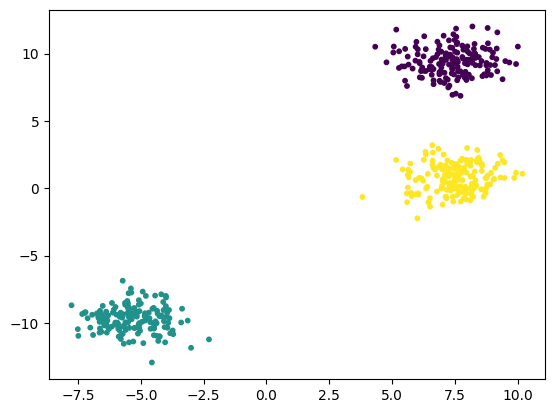

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=labels)
plt.show()

* On peut aussi afficher les centroïdes (centre de chaque cluster) dans le graphique :

In [6]:
# Valeurs des centroïdes
centroids = model.cluster_centers_

# Centroïde du premier groupe (cluster 0)
centroid_x = centroids[:,0]

# Centroïde du deuxième groupe (cluster 1)
centroid_y = centroids[:,1]

# Centroïde du deuxième groupe (cluster 1)


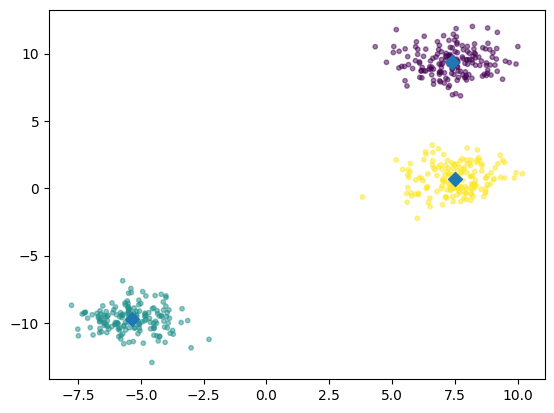

In [7]:
# Nuage de points avec les centroïdes
plt.scatter(X[:, 0], X[:, 1], s=10, c=labels, alpha=0.5)
plt.scatter(centroid_x, centroid_y, marker='D', s=50)
plt.show()

Les centroïdes sont bel et bien au centre des clusters ce qui montre que la segmentation est de
bonne qualité. Ceci est naturellement dû au fait que le nombre de clusters à choisir était très
évident vu qu'il s'agit de données synthétiques. Dans la réalité, on est confronté à de réelles
données et le nombre de clusters n'est pas toujours évident à déterminer.  

Les centroïdes sont les représentants de chaque cluster. Si vous faites par exemple une
segmentation de la clientèle de votre entreprise, vous considérerez que les caractéristiques de
chaque centroïde sont représentatives des caractéristiques de tous les clients du cluster de ce
centroïde. Puisque vous ne pouvez pas connaître personnellement chacun de vos clients, la
segmentation vous donne une idée des différents groupes de clients que vous avez. Ainsi, vous
pouvez adresser des campagnes marketing ciblées pour chacun de ces groupes.

### SEGMENTATION DES DONNEES D’IRIS

L'ensemble de données Iris32 contient 3 classes de 50 instances chacune, chaque classe se
référant à un type de plante d'iris. Une classe est séparable linéairement des 2 autres ; ces
dernières ne sont pas linéairement séparables les unes des autres

In [8]:
import pandas as pd
iris_names = ['sepal_length', 'sepal_width', 'petal_length' ,'petal_width' ,'class']
iris = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/iris.data?token=GHSAT0AAAAAAC4VKTERCC4L7LFODYWAIENEZ4HYHFQ', header=None, names=iris_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Supposons qu'on n'ait pas la colonne class dans l'ensemble des données et qu'on veuille les
segmenter.

In [9]:
# Retrait de la colonne class
species = iris.pop('class')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Comme pour les données synthétiques, nous allons visualiser l'ensemble des données par un
nuage de points afin d'essayer d'identifier le nombre de clusters.

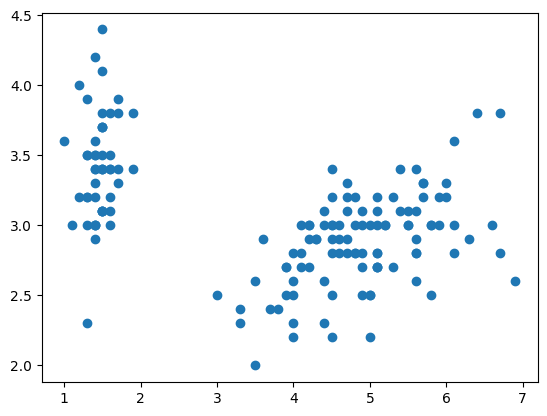

In [10]:
# Nuage de points entre la longueur des pétales et la largeurdes sépales
plt.scatter('petal_length', 'sepal_width', data=iris)
plt.show()

Le nuage de points ci-dessus nous suggère 2, 3 ou 4 clusters ? Contrairement aux données
synthétiques précédentes, le nombre de clusters ici n’est pas évident.

In [11]:
# Mettons les données en tableau numpy
DATA = iris[['petal_length', 'sepal_width']].values

# Création d'un modèle KMeans avec 2 clusters
model_iris = KMeans(n_clusters=2)

# Entraînement du modèle
model_iris.fit(DATA)

# Clusters (labels)
labels_iris = model_iris.predict(DATA)
print(labels_iris)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


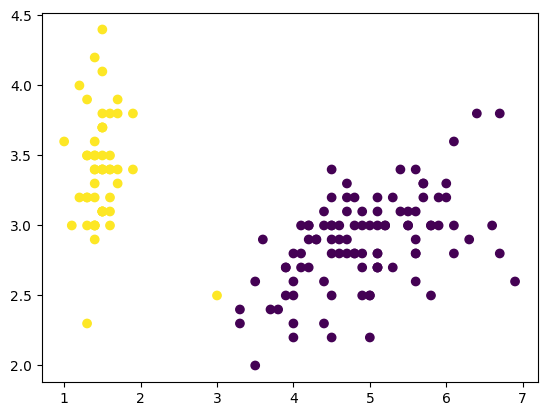

In [12]:
plt.scatter(DATA[:,0], DATA[:,1], c=labels_iris)
plt.show()

Contrairement aux données synthétiques, la segmentation en deux groupes des données d'iris
n'est pas de très bonne qualité. Il y a deux points jaunes qui sont carrément hors de leur groupe.
Effectuons une autre segmentation avec 3 clusters.

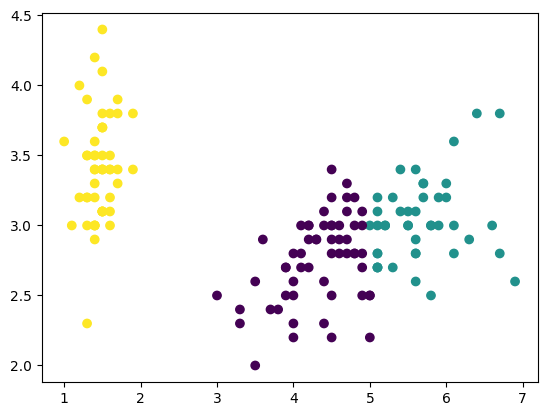

In [13]:
# Création d'un modèle KMeans avec 3 clusters
Model_iris = KMeans(n_clusters=3)

# Entraînement du modèle
Model_iris.fit(DATA)

# Clusters (labels)
Labels_iris = Model_iris.predict(DATA)

# Visualisation des clusters
plt.scatter(DATA[:,0], DATA[:,1], c=Labels_iris)
plt.show()

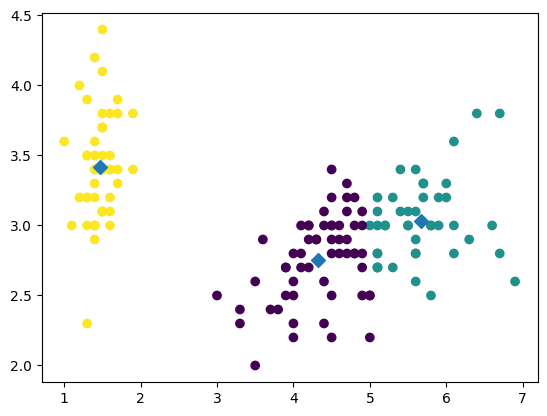

In [14]:
# Centroïdes
Centroids = Model_iris.cluster_centers_
Centroid_x = Centroids[:,0]
Centroid_y = Centroids[:,1]

# Nuage de points avec les centroïdes
plt.scatter(DATA[:,0], DATA[:,1], c=Labels_iris)
plt.scatter(Centroid_x, Centroid_y, marker='D', s=50)
plt.show()

Le résultat est meilleur avec 3 clusters bien qu'il y ait encore quelques écarts. Pourquoi on
n’essayerait pas avec 4, 5, 6, …, n clusters ?  

En matière de clustering avec KMeans, le choix du nombre de clusters revient à l'utilisateur de
l'algorithme. Alors :  
Comment être sûr du nombre de clusters ?  
Comment évaluer la qualité d'une segmentation ?  

Il n'y a malheureusement pas de solution miracle quant au choix du nombre de clusters. Le
choix peut être effectué en fonction de notre connaissance des données et du problème business
que l’on veut résoudre. Par exemple, dans le cas des données iris, on savait qu'il y a trois types
d'espèces d'où le choix d'une segmentation en trois groupes. Nous allons quand même vérifier
la qualité du modèle.

In [15]:
# Création d'une dataframe avec les clusters et les espèces d'iris
df = pd.DataFrame({'Labels':Labels_iris, 'Species':species})

# Tableau croisé pour compter le nombre de fois où chaque espèce coïncide avec chaque cluster (Matrice de confusion).
pd.crosstab(df['Labels'], df['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Labels,,,
0,0,48,9
1,0,2,41
2,50,0,0


Ce tableau croisé nous montre qu'on a effectivement une bonne segmentation des données d'iris avec k = 3. En effet, le cluster 1 correspond à 100% à l'espèce *Iris-setosa*. Le cluster 2 et le
cluster 0 correspondent majoritairement à *Iris-virginica* et à *Iris-versicolor* respectivement.  

Comment déterminer le meilleur nombre de clusters lorsqu'on a des données qui ne sont pas étiquetées ? Rappelons que l'objectif d'un algorithme d'apprentissage automatique non
supervisé est de déterminer par lui-même des relations dans les données non-étiquetées. Il faut donc un moyen pour mesurer la qualité d'une segmentation et ce moyen doit utiliser uniquement
les clusters et les échantillons eux-mêmes. C’est ce que nous verrons dans la section suivante.

## SEGMENTATION D’ESPECES DE POISSONS  

L'ensemble des données de cette partie est un tableau d'échantillons donnant des mesures *(le poids en grammes, la longueur en centimètres, le rapport en pourcentage de la hauteur à la longueur, etc.) de 7 espèces de poissons codées de 1 à 7*. Chaque ligne représente un poisson individuel. Ces données proviennent de [Journal of Statistics Education](https://jse.amstat.org/jse_data_archive.htm). Consultez la
 [description](https://jse.amstat.org/datasets/fishcatch.txt)de ces données que vous pouvez télécharger via cette [page](https://jse.amstat.org/datasets/fishcatch.dat.txt).

In [16]:
columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height%', 'Width%', 'Sex']

fishes = pd.read_csv('http://jse.amstat.org/datasets/fishcatch.dat.txt', delimiter= '\s+', header=None, names=columns)
fishes.head()

,Species,Weight,Length1,Length2,Length3,Height%,Width%,Sex
1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN


In [17]:
# Informations sur les données
fishes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 1 to 159
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Weight   158 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height%  159 non-null    float64
 6   Width%   159 non-null    float64
 7   Sex      72 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 11.2 KB


In [18]:
# Suppression de la colonne 'Sex' qui contient beaucoup de valeurs manquantes
fishes.drop(['Sex'], axis=1, inplace=True)

# Suppression de la ligne de données manquantes dans la colonne 'Weight'
fishes.dropna(axis=0, inplace=True)

# Supposons qu'on a pas la colonnne Species
Species = fishes.pop('Species')


# Création du tableau d'échantillons
fishes_array = fishes.values

### METHODE DU COUDE (ELBOW METHOD)  

Puisqu'on on n'a pas une idée du nombre de clusters adéquat, on exécutera l'algorithme KMeans pour plusieurs nombres de clusters et on choisira le meilleur nombre grâce à la méthode du coude ([Elbow method ](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.)).

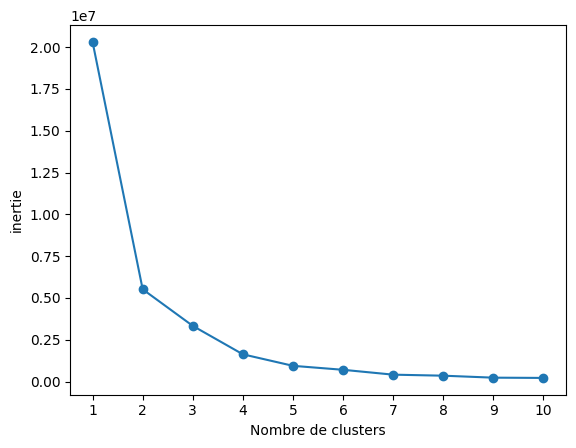

In [19]:
n = range(1,11)
inerties = []

for k in n:
  # Modèle KMeans avec k clusters
  kmeans = KMeans(n_clusters=k)

  # Entraînement du modèle
  kmeans.fit(fishes_array)

  # Inerties de chacun des n modèles
  inerties.append(kmeans.inertia_)


# Graphique d'inertie en fonction du nombre de clusters
plt.plot(n, inerties, '-o')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertie')
plt.xticks(n)
plt.show()

La méthode du 'coude' consiste à choisir le *k (nombre de clusters)* pour lequel on observe un 'coude' dans la courbe de l'inertie en fonction des k. En d'autres termes, on choisit le k à partir duquel l'inertie commence à diminuer plus lentement. En effet, un bon clustering a des clusters serrés (c'est-à-dire que la distance *intra-cluster* est faible et la distance *inter-cluster* est grande) donc de *faible inertie*.  

En appliquant donc cette méthode, on choisit k = 4. Visualisons à présent les clusters

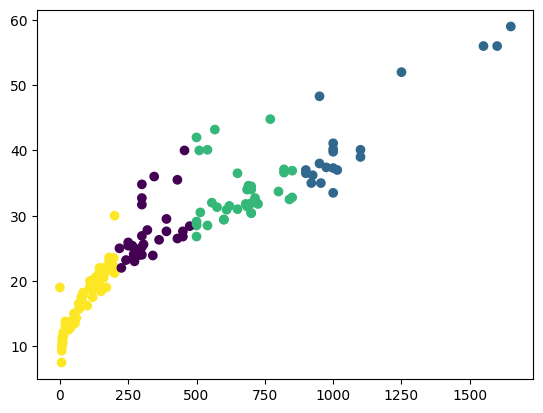

In [20]:
# Construction du modèle KMeans avec 4 clusters
model_fishes = KMeans(n_clusters=4) # Vous pouvez mettre d'autres valeurs pour n_clusters et observez le graphique

# Entraînement + Predictions
labels_fishes = model_fishes.fit_predict(fishes_array)

# Visualisation des clusters
plt.scatter(fishes_array[:, 0], fishes_array[:, 1], c=labels_fishes)
plt.show()

### SEGMENTATION DES VINS  

Ces données sont le résultat d'une analyse chimique de vins cultivés dans la même région d'Italie
mais issus de trois cultures différentes. L'analyse a déterminé les quantités de 13 constituants trouvés dans chacun des trois types de vins (Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine )

In [21]:
wines_cols = ['class_label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
              'Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
              'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wines = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/wine.data?token=GHSAT0AAAAAAC4VKTEQHQYFMFSBMRLPVN6IZ4HZDYA',
                    header=None, names=wines_cols, index_col=False)
wines.head()

,class_label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class_label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [23]:
wines['class_label'].unique()

array([1, 2, 3])

Il y a trois catégories de vins (numérotées 1, 2 et 3) dans l'ensemble des données. Supposons
que nous n'avions pas la colonne class_label. L'objectif sera donc de regrouper ces vins en des
catégories distinctes en utilisant leurs caractéristiques physico-chimiques.  

Dans un premier temps, appliquons la méthode du coude pour déterminer le nombre de clusters
adéquat et dans un second temps, construisons le modèle KMeans avec le nombre de clusters
déterminé.

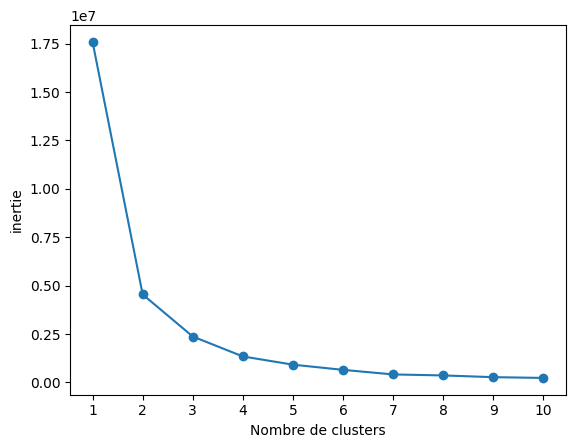

In [24]:
class_labels = wines.pop('class_label')

wines_array = wines.values

inertias = []

for k in n: # n = range(1,11)
  # Modèle KMeans avec k clusters
  kmeans = KMeans(n_clusters=k)

  # Entraînement du modèle
  kmeans.fit(wines_array)

  # Inerties de chacun des n modèles
  inertias.append(kmeans.inertia_)

# Graphique d'inertie en fonction du nombre de clusters
plt.plot(n, inertias, '-o')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertie')
plt.xticks(n)
plt.show()

Ce graphique nous suggère 3 clusters.

In [25]:
wines_model = KMeans(n_clusters=3)
labels_wines = wines_model.fit_predict(wines_array)
wines_df = pd.DataFrame({'Labels':labels_wines, 'Varieties':class_labels})
pd.crosstab(wines_df['Labels'], wines_df['Varieties'])

Varieties,1,2,3
Labels,,,
0,46,1,0
1,0,50,19
2,13,20,29


L'examen de ce tableau croisé nous montre qu’on n’a pas une bonne segmentation. Et pourtant,
il y a bel et bien 3 variétés de vins dans l'ensemble des données. Que s'est-il donc passé ?  

Dans notre ensemble de données, on a des variables qui ne sont pas à la même échelle. Ceci
affecte la qualité de la segmentation étant donné que l'algorithme KMeans calcule les distances
entre les points et regroupe les k points les plus proches. Il est recommandé alors de standardiser
les données avant application de l'algorithme.  

Nous pouvons combiner les deux étapes (Standardisation et Modélisation) dans un pipeline :

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
wines_sc_model = KMeans(n_clusters=3)

# Création d'un objet pipeline
pipeline = make_pipeline(scaler, wines_sc_model)

labels_sc_wines = pipeline.fit_predict(wines_array)

wines_sc_df = pd.DataFrame({'Labels':labels_sc_wines, 'Varieties':class_labels})
pd.crosstab(wines_sc_df['Labels'], wines_sc_df['Varieties'])

Varieties,1,2,3
Labels,,,
0,0,1,48
1,59,8,0
2,0,62,0


La standardisation, en réduisant la variance dans les données, a augmenté considérablement la
qualité de notre segmentation.  

## CONCLUSION
En définitive, l’algorithme KMeans est un algorithme de Machine Learning non supervisé dont
l’implémentation dans Python est très simple. Dans ce projet, nous avons vu le flux de travail
dans un projet de clustering. Bien que le choix du nombre de clusters revienne à l’utilisateur de
l’algorithme, il doit être fait soigneusement. La visualisation des données ainsi que la méthode
du coude permettent d’effectuer un bon choix. Par ailleurs, la compréhension du business est
aussi un grand atout.